In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
experiment_1 = 'MainVariacionDensidad'
experiment_2 = 'MainVariacionHilosOperacionesTotalesConstantes'
experiment_3 = 'MainVariacionHilosOperacionesPorHiloConstantes'
data_folder = '../data/random/'


method_labels = ['Granularidad Fina', 'Lock Free', 'Lock Optimista']
methods = [label.upper().replace(' ', '_') for label in method_labels]

In [3]:
def get_df(folder, experiment, method):
    return pd.read_csv(folder + experiment + '_' + method + '.csv')

def get_mean_time_grouped_by_field(df, field):
    return df.groupby(field)['Time (ms)'].mean()

def bar_plot_means(means, method_labels, bar_width, x_label, y_label, title):
    fig, ax = plt.subplots(figsize=(10, 6))

    x_1 = [i + 0 * bar_width for i in means[0].index]
    x_2 = [i + 1 * bar_width for i in means[0].index]
    x_3 = [i + 2 * bar_width for i in means[0].index]
    xs = [x_1, x_2, x_3]
    

    [ax.bar(x, mean.values, width=bar_width, label=label) for x, mean, label in zip(xs, means, method_labels)]

    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)

    ax.set_xticks(x_2)
    ax.set_xticklabels(x_1)

    ax.legend()
    plt.show()
    
def violin_plot_means(dfs, method_labels, group_by_field, x_label, y_label, title):
    df_concat = pd.concat(dfs)

    plt.figure(figsize=(10, 6))
    sns.violinplot(x=group_by_field, y='Time (ms)', hue='Method', data=df_concat)

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    plt.show()

## Average time MainVariacionDensidad

In [4]:
group_by_field = 'proporcionAdders'
x_label = 'Proporción hilos agregadores sobre hilos totales'
y_label = 'Tiempo promedio (ms)'
title = 'Comparativa de tiempo promedio por método'

In [5]:
def line_plot_means(means, method_labels, x_label, y_label, title):
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.grid(True)

    [ax.plot(mean.index, mean.values, label=method_label) for mean, method_label in zip(means, method_labels)]

    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)

    ax.legend()
    plt.show()

    
def get_average_time_plots(folder, experiment, methods, method_labels, group_by_field, x_label, y_label, title):
    method_dfs = [get_df(folder, experiment, method) for method in methods]
    for df in method_dfs:
        df['proporcionAdders'] = df['numAdders'] / (df['numAdders'] + df['numRemovers'])
    for df, method_label in zip(method_dfs, method_labels):
        df['Method'] = method_label
        
    mean_times = [get_mean_time_grouped_by_field(method_df, group_by_field) for method_df in method_dfs]
    line_plot_means(mean_times, method_labels, x_label, y_label, title)
    bar_plot_means(mean_times, method_labels, 0.02, x_label, y_label, title)
    violin_plot_means(method_dfs, method_labels, group_by_field, x_label, y_label, title)

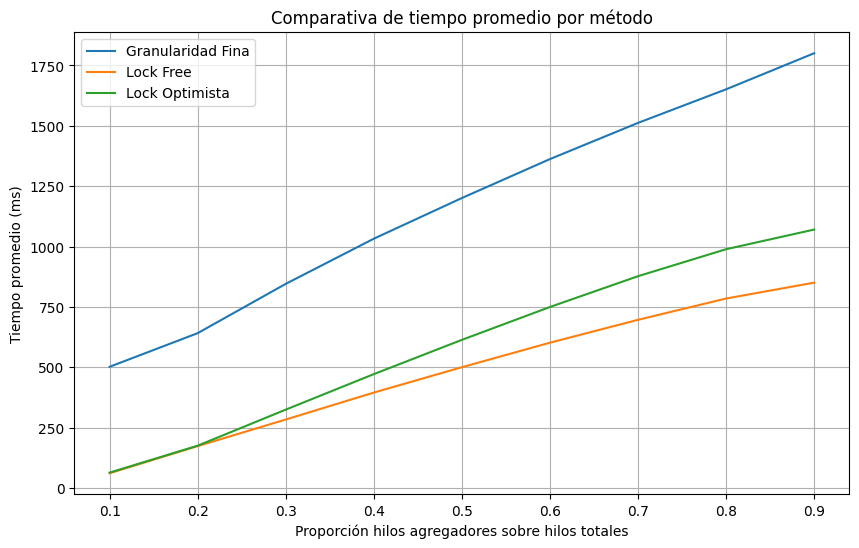

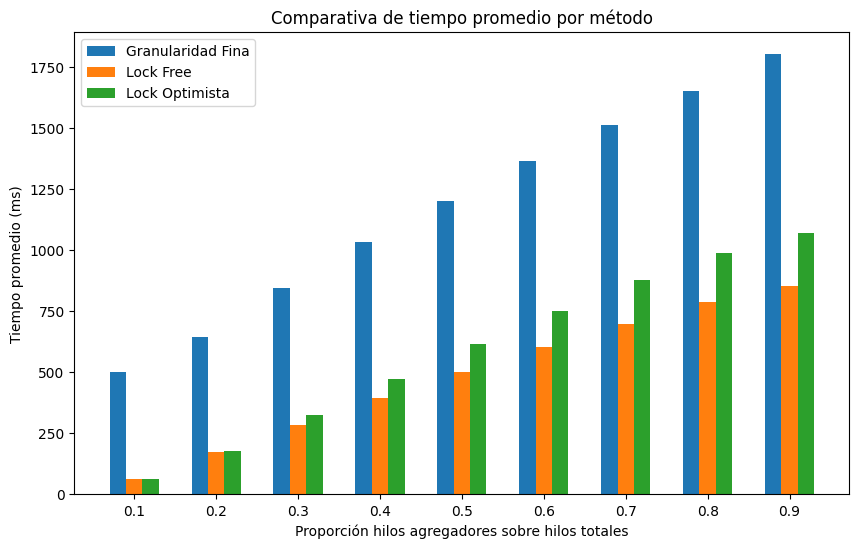

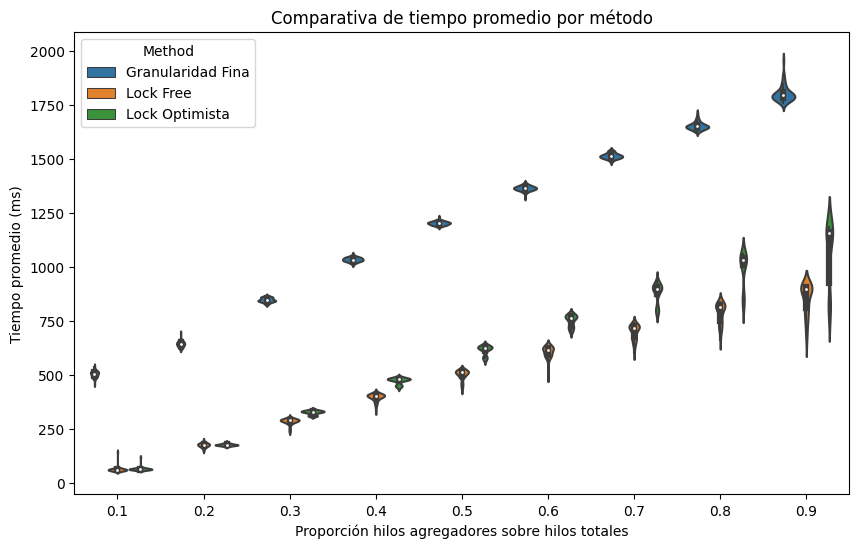

In [6]:
get_average_time_plots(data_folder, experiment_1, methods, method_labels, group_by_field, x_label, y_label, title)

## Average time MainVariacionHilosOperacionesTotalesConstantes

In [7]:
group_by_field = 'CantidadHilos'
x_label = 'Cantidad de hilos'
y_label = 'Tiempo promedio (ms)'
title = 'Comparativa de tiempo promedio por método'

In [8]:
def line_plot_means(means, method_labels, x_label, y_label, title):
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.grid(True)

    [ax.plot(mean.index, mean.values, label=method_label) for mean, method_label in zip(means, method_labels)]
    ax.set_xticks([2,4,6,8,10])

    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)

    ax.legend()
    plt.show()
    

def get_average_time_plots(folder, experiment, methods, method_labels, group_by_field, x_label, y_label, title):
    method_dfs = [get_df(folder, experiment, method) for method in methods]
    mean_times = [get_mean_time_grouped_by_field(method_df, group_by_field) for method_df in method_dfs]
    for df, method_label in zip(method_dfs, method_labels):
        df['Method'] = method_label
    line_plot_means(mean_times, method_labels, x_label, y_label, title)
    bar_plot_means(mean_times, method_labels, 0.25, x_label, y_label, title)
    violin_plot_means(method_dfs, method_labels, group_by_field, x_label, y_label, title)
    

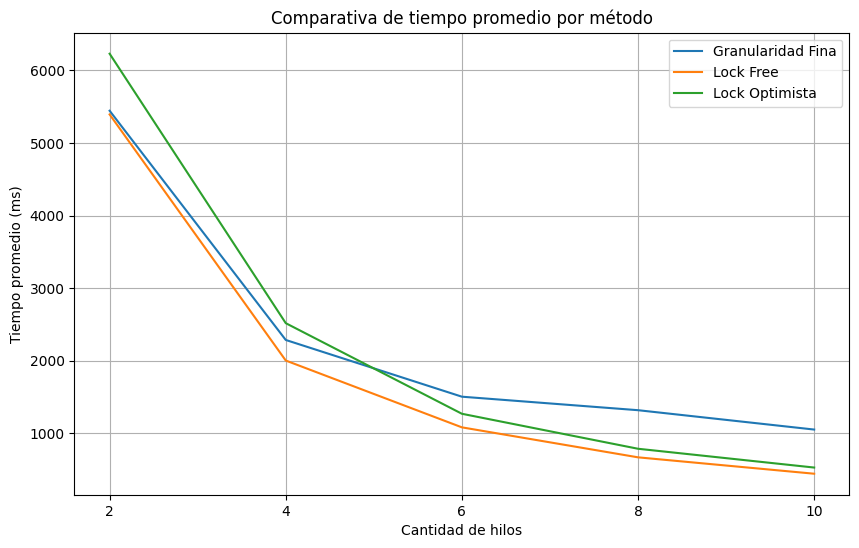

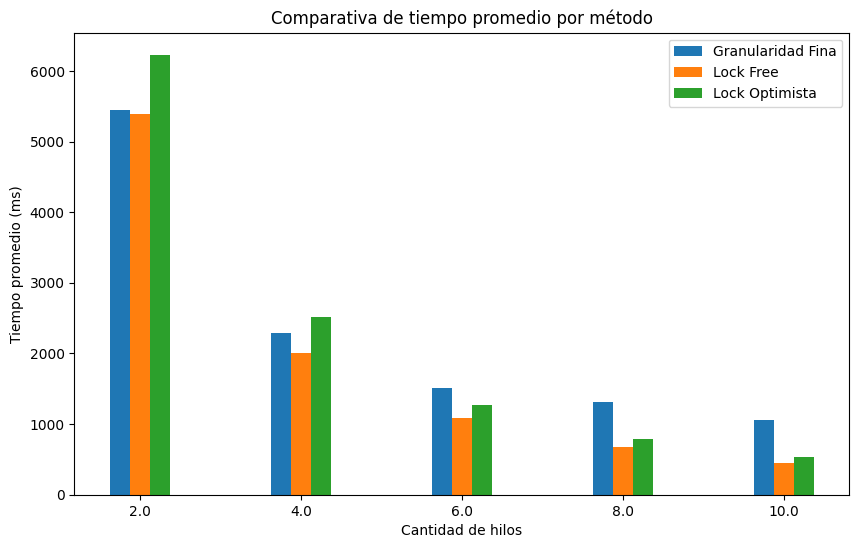

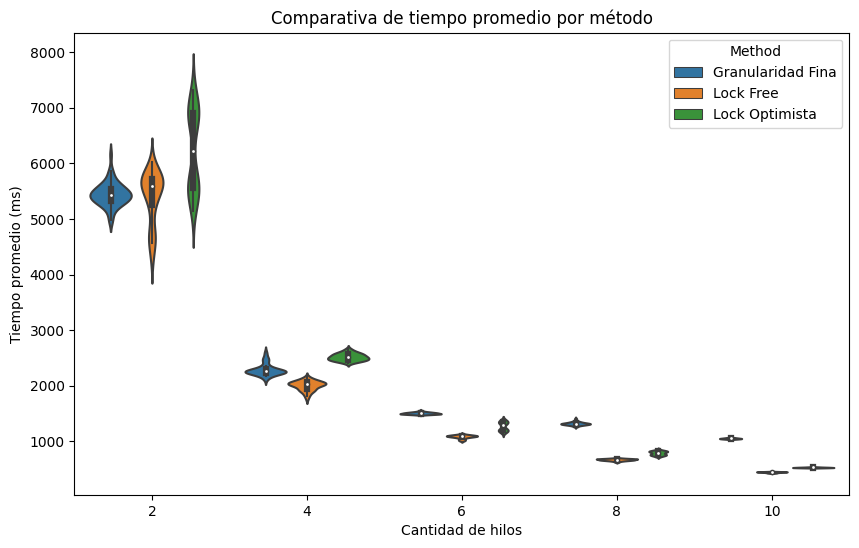

In [9]:
get_average_time_plots(data_folder, experiment_2, methods, method_labels, group_by_field, x_label, y_label, title)

## Average time MainVariacionHilosOperacionesPorHiloConstantes

In [10]:
group_by_field = 'CantidadHilos'
x_label = 'Cantidad de hilos'
y_label = 'Tiempo promedio (ms)'
title = 'Comparativa de tiempo promedio por método'

In [11]:
def line_plot_means(means, method_labels, x_label, y_label, title):
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.grid(True)

    [ax.plot(mean.index, mean.values, label=method_label) for mean, method_label in zip(means, method_labels)]
    ax.set_xticks([2,4,6,8,10])
    plt.yticks(range(0, int(plt.ylim()[1]) + 1, 100))

    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)

    ax.legend()
    plt.show()

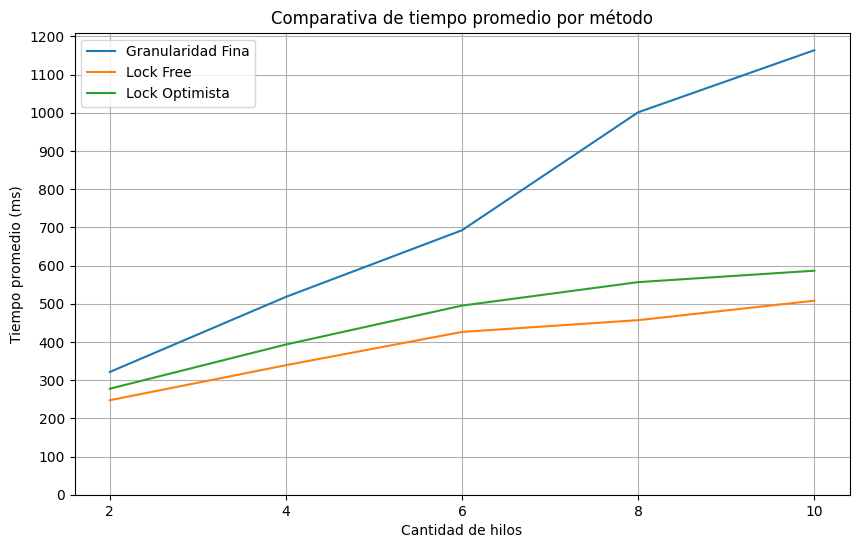

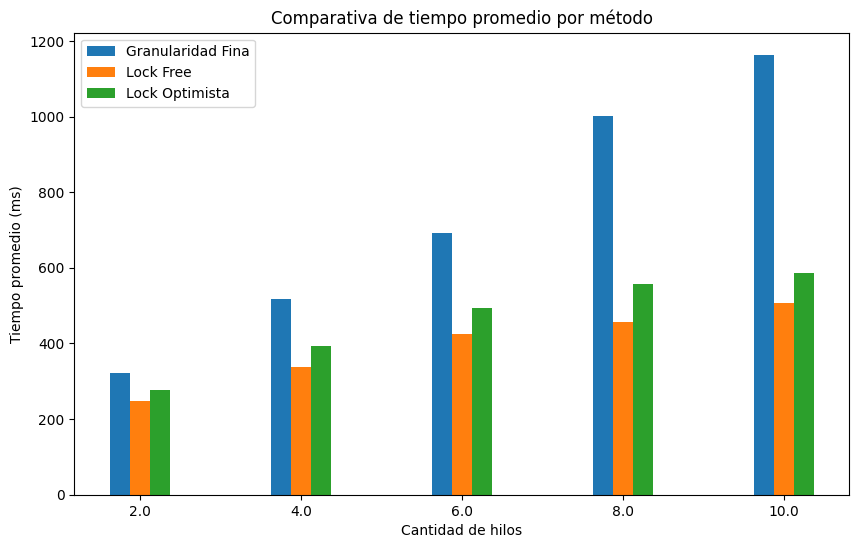

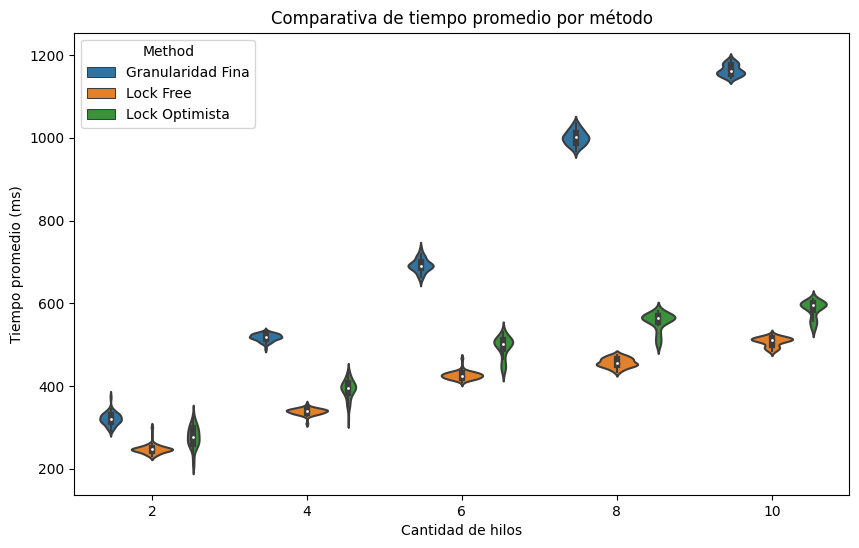

In [12]:
get_average_time_plots(data_folder, experiment_3, methods, method_labels, group_by_field, x_label, y_label, title)